# Lecture-08 Thin Films-1
* author : Wei-Kai Lee
* Data : 2019/02/23

In [20]:
# python module
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# optics module
from optics.TransferMatrix import cal_r_tau_from_structure, cal_field_z, plot_fun, cal_field_z_2
from optics.RTA import cal_TRA_from_structure
from optics.PlaneWave import cal_s, cal_p

In our previous lecture, although we derive the general form of transfer matrix of the stacking layered structure, we only consider the case of one interface between two materials. Hence, in the lecture, we are going dicuss the multi-layer case.

<img src="Lecture-8-Material/Fig-1.jpg" width= "400">
$$Fig. 1.$$

In [22]:
# constants
e0, mu0 = 1.0, 1.0
c = 1/np.sqrt(e0*mu0)

# input structure and parameters
n_array = np.array( [1.5, 1.0, 1.5], dtype = np.complex )
theta1 = np.linspace( 0, np.pi/2 , 100)
wavelength = 520
thickness_list = [0, 10, 0]

# input parameters process
ko = 2*np.pi/wavelength
w = c * ko

# from angle to wave number
k1 = n_array[0]*ko
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )

# calculation by transfer matrix
er_list = n_array**2
tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

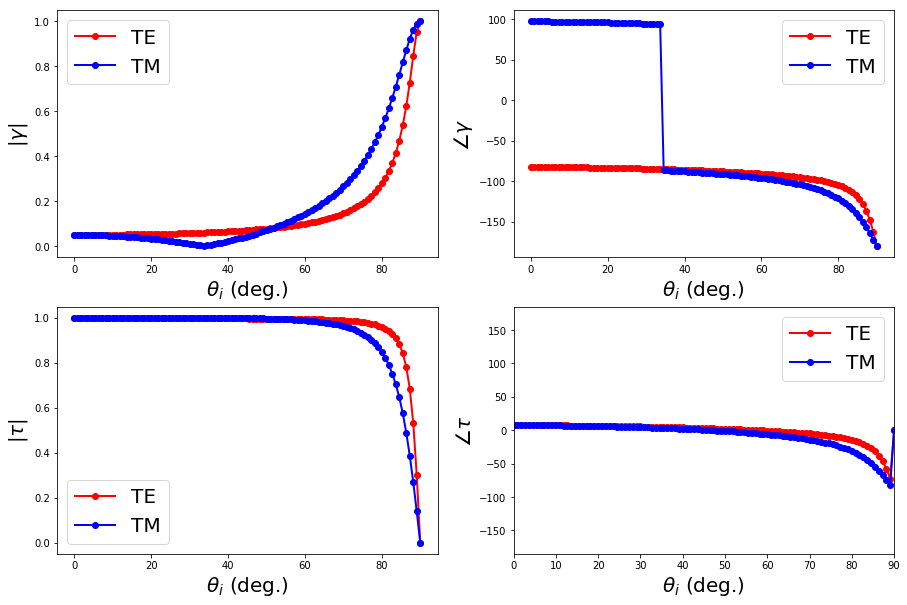

In [25]:
## plot data
fig, axes = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0,0].plot( theta1*180/np.pi, np.abs( r_s_E_TM ), 'ro-', linewidth=2.0)
axes[0,0].plot( theta1*180/np.pi, np.abs( r_p_H_TM ), 'bo-', linewidth=2.0)
axes[0,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,0].set_ylabel(r'$|\gamma|$', fontsize=20)
axes[0,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[0,1].plot( theta1*180/np.pi, np.angle( r_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[0,1].plot( theta1*180/np.pi, np.angle( r_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[0,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,1].set_ylabel(r'$\angle\gamma$', fontsize=20)
axes[0,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

axes[1,0].plot( theta1*180/np.pi, np.abs( tau_s_E_TM ), 'ro-', linewidth=2.0)
axes[1,0].plot( theta1*180/np.pi, np.abs( tau_p_H_TM ), 'bo-', linewidth=2.0)
axes[1,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,0].set_ylabel(r'$|\tau|$', fontsize=20)
axes[1,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[1,1].plot( theta1*180/np.pi, np.angle( tau_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[1,1].plot( theta1*180/np.pi, np.angle( tau_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[1,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,1].set_ylabel(r'$\angle\tau$', fontsize=20)
axes[1,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -185, 185)

In [26]:
Ts, Rs, As = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
Tp, Rp, Ap = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

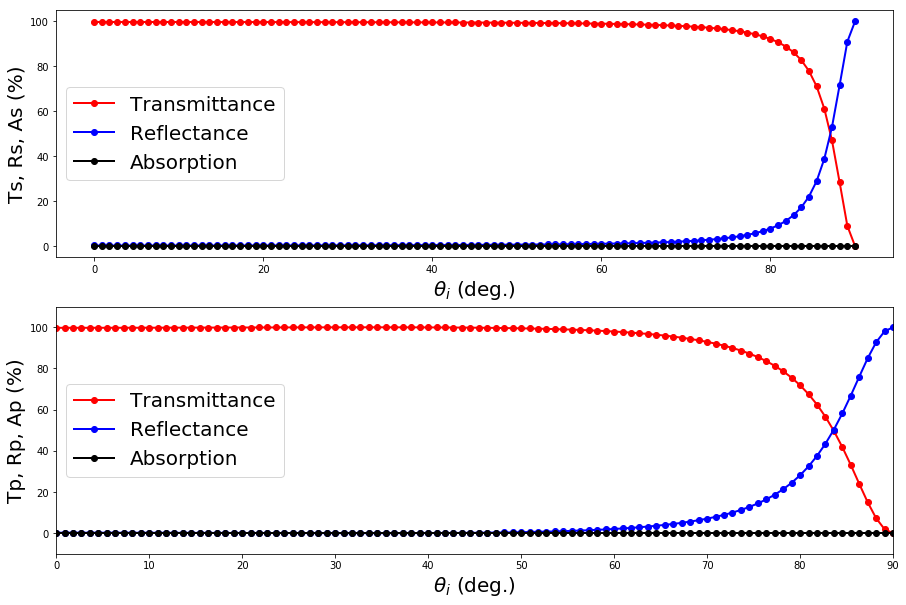

In [27]:
## plot data
fig, axes = plt.subplots(2,1)

axes[0].plot( theta1*180/np.pi, Ts * 100, 'ro-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, Rs * 100, 'bo-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, As * 100, 'ko-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'Ts, Rs, As (%)', fontsize=20)
axes[0].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

axes[1].plot( theta1*180/np.pi, Tp * 100, 'ro-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Rp * 100, 'bo-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Ap * 100, 'ko-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'Tp, Rp, Ap (%)', fontsize=20)
axes[1].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -10, 110)

In **Lecture 6-3**, we have discussed the transmission coefficient and the reflection coefficient with the refractive index of the incident material 1.5 and the refractive index of the transmissive index 1.0. In that case, the transmittance would become 0.0 when $\theta_i > \theta_c$ between $n_1=1.5$ and $n_2=1.0$. However, in this case, although the refractive index of the incident material is larger than the refractive index of the second material, there seems not critical angle appears in when the third material is very close to the first material. Besides, when $\theta_i$ is small, the transmittance is close to 100% and the reflectance is close to 0%. Besides, although it is not obvious in the RTA figure, you still can observe the Brewster angle from $\gamma$ and $\tau$ for TM mode. 

In [14]:
theta1 = np.array( [0, 30, 60], dtype=np.float )/180*np.pi
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )
z_list = np.linspace(-20, 100, 200)
Ep_zlist, En_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TE', Fp = 1.0)
Hp_zlist, Hn_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TM', Fp = 1.0)

tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

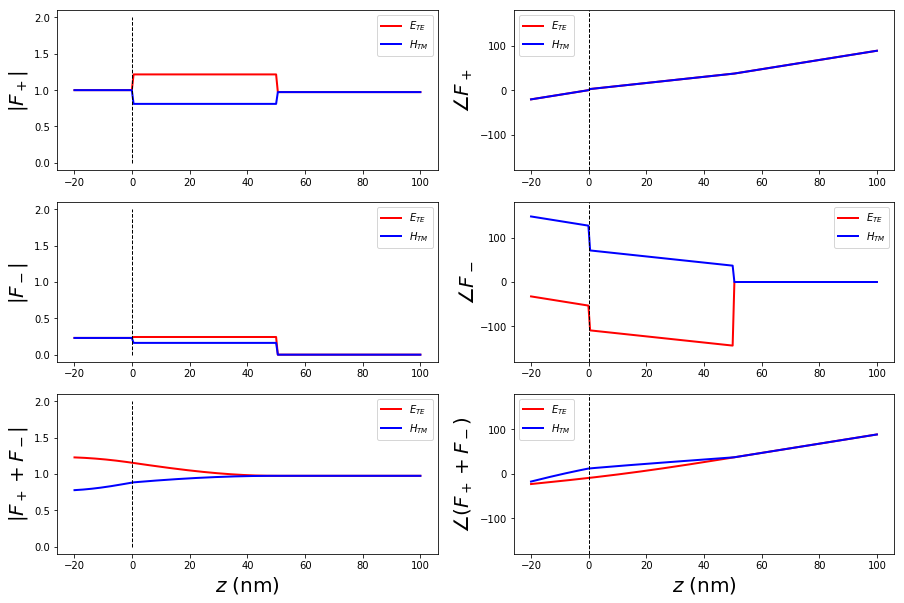

In [34]:
# incidence angle = 0
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=0)

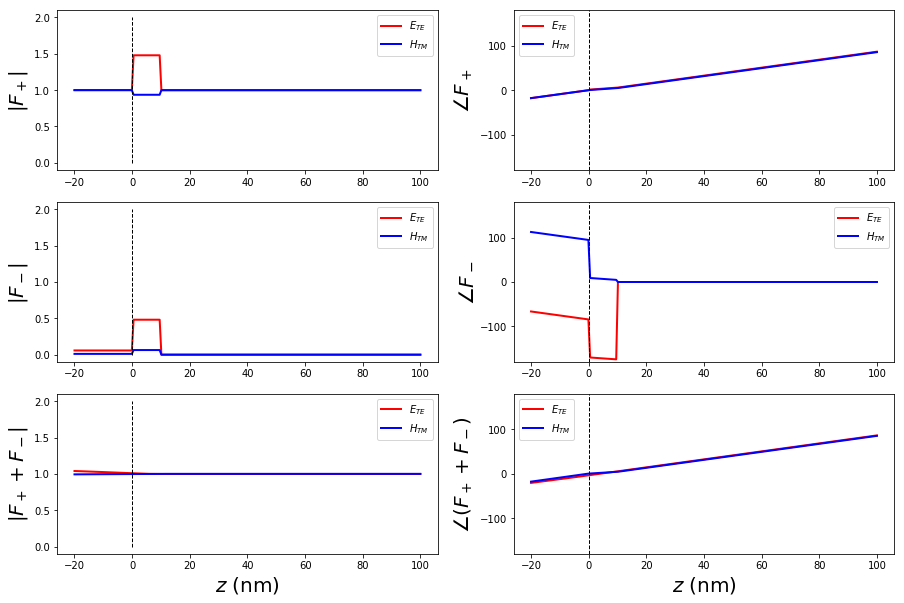

In [17]:
# incidence angle = 30
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=1)

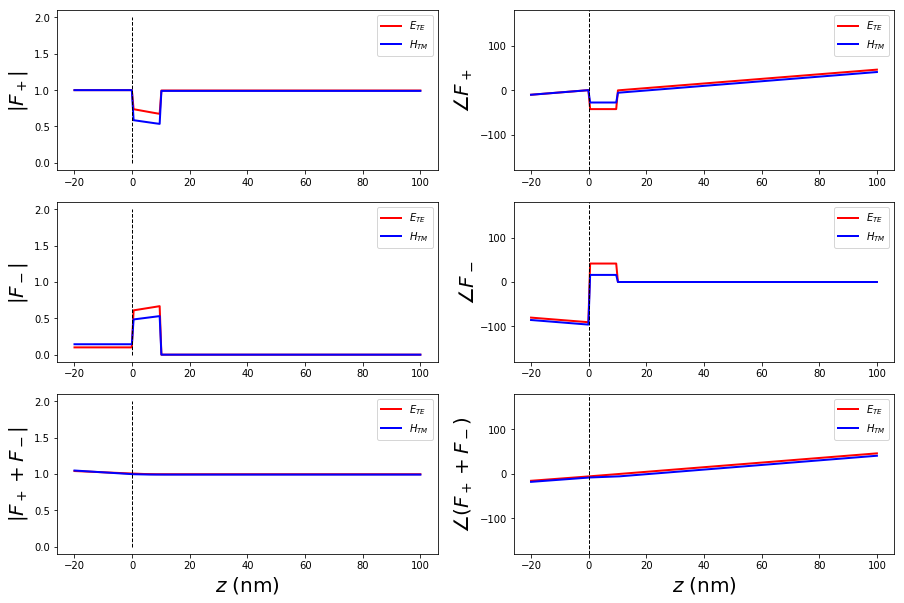

In [18]:
# incidence angle = 60
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=2)

For $0^o$, $30^o$, and $60^o$ incidence, the total field is roughly the same over different z, showing the air would not influence the EM propagation. So, it seems that for the wave, it cannot perceive the air because the air is too thin.

<img src="Lecture-8-Material/Fig-2.jpg" width= "400">
$$Fig. 2.$$

In [29]:
# constants
e0, mu0 = 1.0, 1.0
c = 1/np.sqrt(e0*mu0)

# input structure and parameters
n_array = np.array( [1.5, 1.0, 1.5], dtype = np.complex )
theta1 = np.linspace( 0, np.pi/2 , 100)
wavelength = 520
thickness_list = [0, 50, 0]

# input parameters process
ko = 2*np.pi/wavelength
w = c * ko

# from angle to wave number
k1 = n_array[0]*ko
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )

# calculation by transfer matrix
er_list = n_array**2
tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-185, 185)

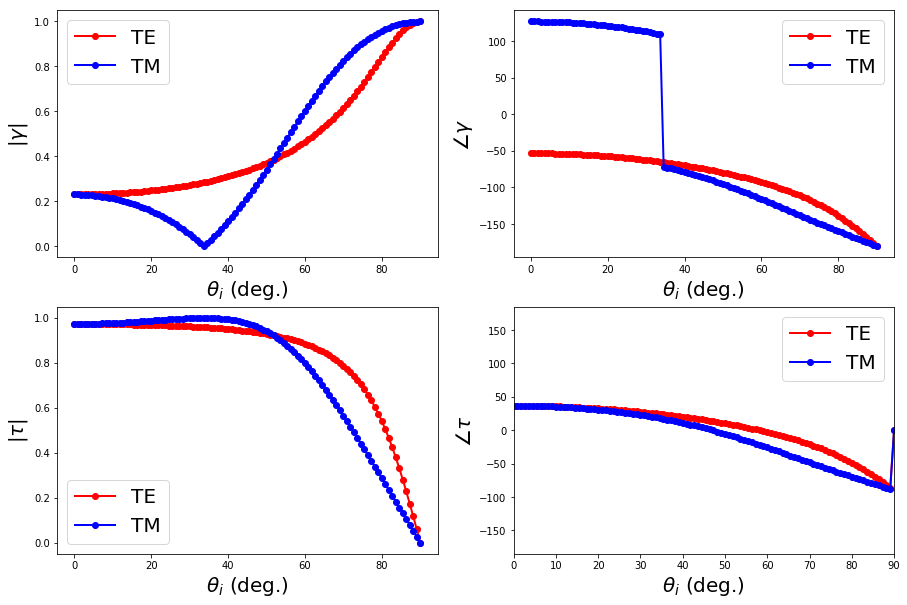

In [30]:
## plot data
fig, axes = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0,0].plot( theta1*180/np.pi, np.abs( r_s_E_TM ), 'ro-', linewidth=2.0)
axes[0,0].plot( theta1*180/np.pi, np.abs( r_p_H_TM ), 'bo-', linewidth=2.0)
axes[0,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,0].set_ylabel(r'$|\gamma|$', fontsize=20)
axes[0,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[0,1].plot( theta1*180/np.pi, np.angle( r_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[0,1].plot( theta1*180/np.pi, np.angle( r_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[0,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,1].set_ylabel(r'$\angle\gamma$', fontsize=20)
axes[0,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

axes[1,0].plot( theta1*180/np.pi, np.abs( tau_s_E_TM ), 'ro-', linewidth=2.0)
axes[1,0].plot( theta1*180/np.pi, np.abs( tau_p_H_TM ), 'bo-', linewidth=2.0)
axes[1,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,0].set_ylabel(r'$|\tau|$', fontsize=20)
axes[1,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[1,1].plot( theta1*180/np.pi, np.angle( tau_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[1,1].plot( theta1*180/np.pi, np.angle( tau_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[1,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,1].set_ylabel(r'$\angle\tau$', fontsize=20)
axes[1,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -185, 185)

In [31]:
Ts, Rs, As = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
Tp, Rp, Ap = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-10, 110)

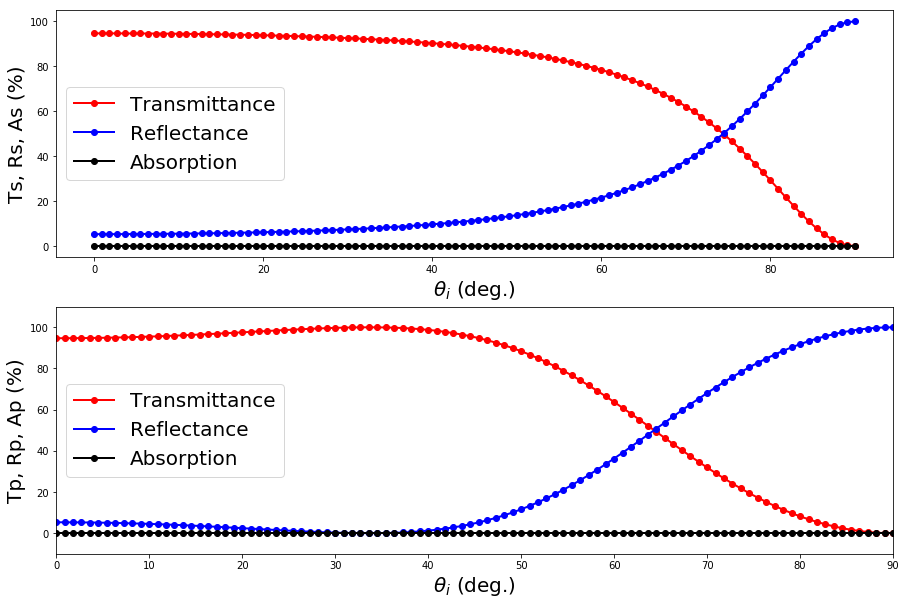

In [32]:
## plot data
fig, axes = plt.subplots(2,1)

axes[0].plot( theta1*180/np.pi, Ts * 100, 'ro-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, Rs * 100, 'bo-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, As * 100, 'ko-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'Ts, Rs, As (%)', fontsize=20)
axes[0].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

axes[1].plot( theta1*180/np.pi, Tp * 100, 'ro-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Rp * 100, 'bo-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Ap * 100, 'ko-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'Tp, Rp, Ap (%)', fontsize=20)
axes[1].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -10, 110)

When increasing the thickness of the air to 50 nm, the reflection coefficient and the refectance becomes larger.Besides, the reflectance start increasing or the transmittance start decreasing when $\theta_i$ is small, indicating the air cannot be neglected anymore.

In [33]:
theta1 = np.array( [0, 30, 60], dtype=np.float )/180*np.pi
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )
z_list = np.linspace(-20, 100, 200)
Ep_zlist, En_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TE', Fp = 1.0)
Hp_zlist, Hn_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TM', Fp = 1.0)

tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

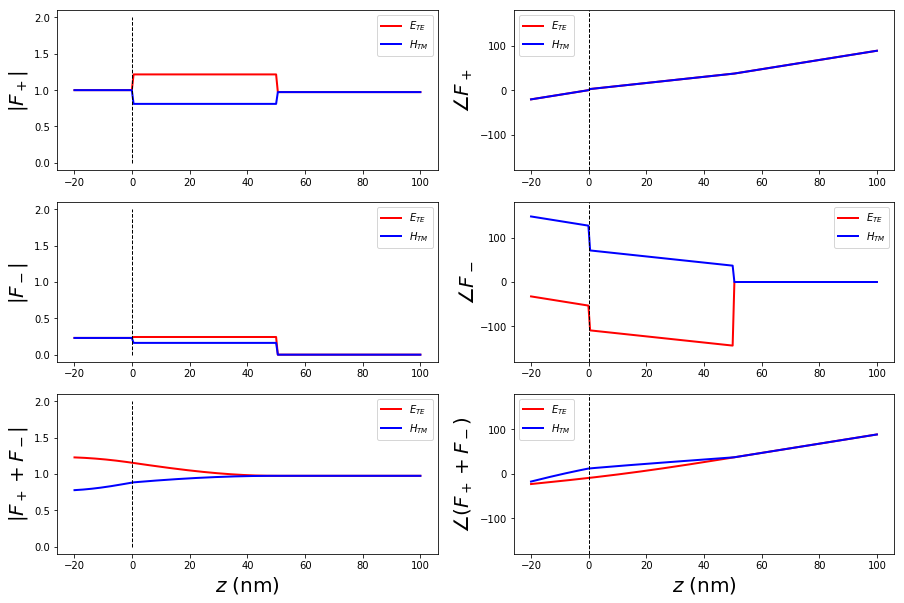

In [35]:
# incidence angle = 0
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=0)

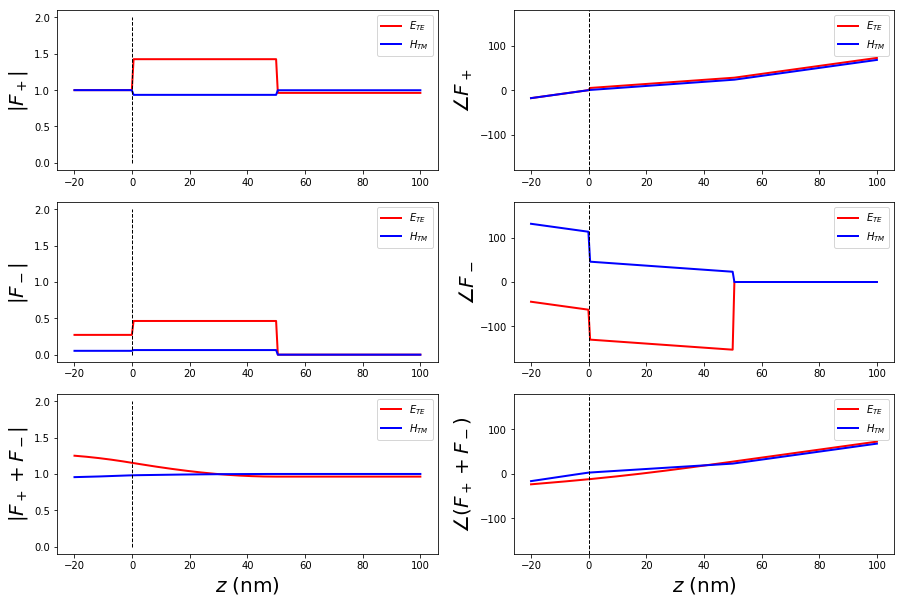

In [37]:
# incidence angle = 30
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=1)

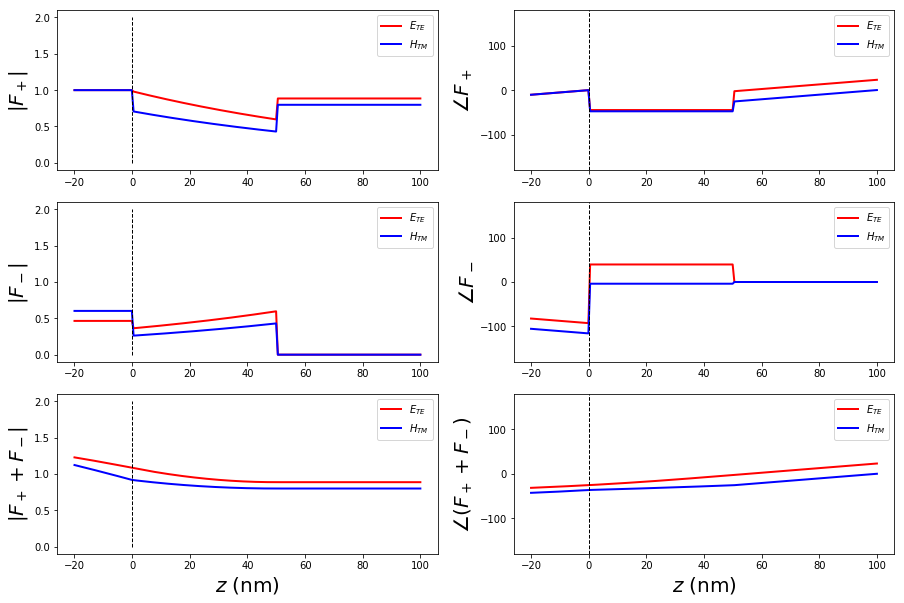

In [38]:
# incidence angle = 60
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=2)

When $\theta_i=60^o$ ($\theta_i>\theta_c$ between $n_1=1.5$ and $n_2=1.0$), it is obvious that the field start decreasing in the air. Although the field is propagating in first material, the field is not propagating in the air because the tangential wave number ($k_t$) is larger than the wave number in the air ($n_{air}k_o$) and hence, $k_z$ is a pure imaginary value, corresponding to evanescent wave. As we discussed in **Lecture 7**, an evanescent wave toward only +z or -z could not carry the energy. Here, because the interface between the second material and the third material would reflect the +z evanescent wave to -z evanescent wave, there would be both +z and -z evanescent wave in the air. As in **Lecture 7**, the cross-over term between +z and -z evanescnet wave could carry the energy from the first material to the third material, showing that the energy can tunnel through the air.

<img src="Lecture-8-Material/Fig-3.jpg" width= "400">
$$Fig. 3.$$

In [41]:
# constants
e0, mu0 = 1.0, 1.0
c = 1/np.sqrt(e0*mu0)

# input structure and parameters
n_array = np.array( [1.5, 1.0, 1.5], dtype = np.complex )
theta1 = np.linspace( 0, np.pi/2 , 100)
wavelength = 520
thickness_list = [0, 100, 0]

# input parameters process
ko = 2*np.pi/wavelength
w = c * ko

# from angle to wave number
k1 = n_array[0]*ko
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )

# calculation by transfer matrix
er_list = n_array**2
tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-185, 185)

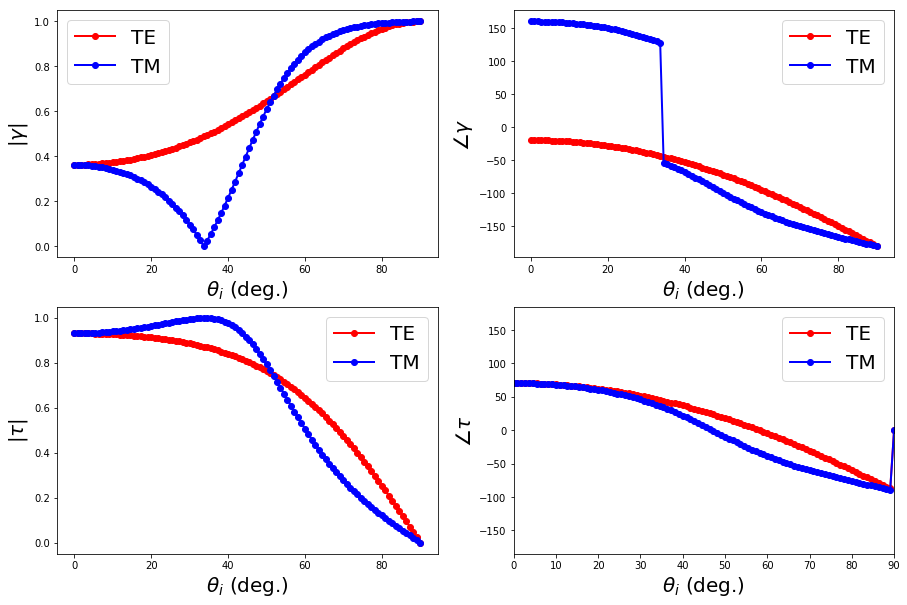

In [42]:
## plot data
fig, axes = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0,0].plot( theta1*180/np.pi, np.abs( r_s_E_TM ), 'ro-', linewidth=2.0)
axes[0,0].plot( theta1*180/np.pi, np.abs( r_p_H_TM ), 'bo-', linewidth=2.0)
axes[0,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,0].set_ylabel(r'$|\gamma|$', fontsize=20)
axes[0,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[0,1].plot( theta1*180/np.pi, np.angle( r_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[0,1].plot( theta1*180/np.pi, np.angle( r_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[0,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,1].set_ylabel(r'$\angle\gamma$', fontsize=20)
axes[0,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

axes[1,0].plot( theta1*180/np.pi, np.abs( tau_s_E_TM ), 'ro-', linewidth=2.0)
axes[1,0].plot( theta1*180/np.pi, np.abs( tau_p_H_TM ), 'bo-', linewidth=2.0)
axes[1,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,0].set_ylabel(r'$|\tau|$', fontsize=20)
axes[1,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[1,1].plot( theta1*180/np.pi, np.angle( tau_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[1,1].plot( theta1*180/np.pi, np.angle( tau_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[1,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,1].set_ylabel(r'$\angle\tau$', fontsize=20)
axes[1,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -185, 185)

In [43]:
Ts, Rs, As = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
Tp, Rp, Ap = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-10, 110)

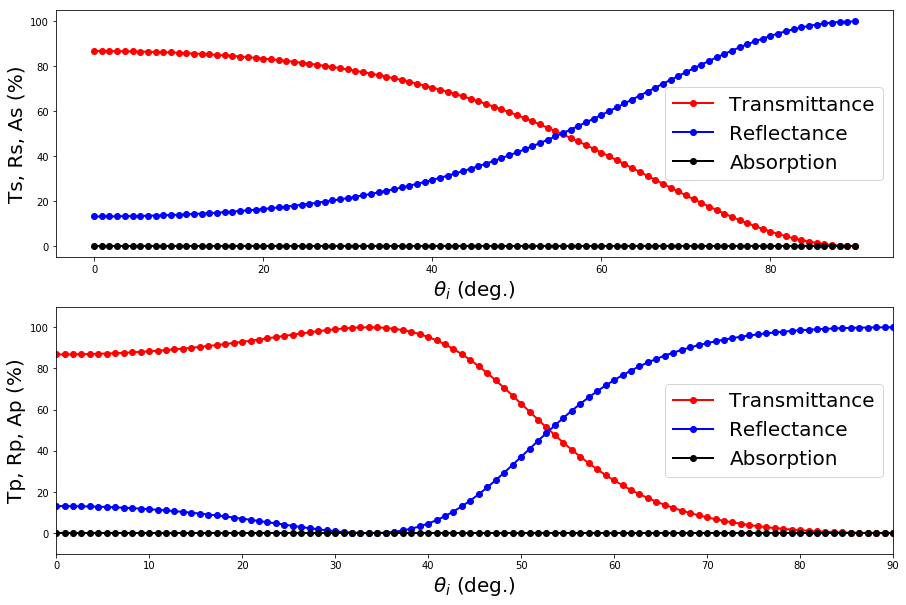

In [44]:
## plot data
fig, axes = plt.subplots(2,1)

axes[0].plot( theta1*180/np.pi, Ts * 100, 'ro-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, Rs * 100, 'bo-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, As * 100, 'ko-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'Ts, Rs, As (%)', fontsize=20)
axes[0].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

axes[1].plot( theta1*180/np.pi, Tp * 100, 'ro-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Rp * 100, 'bo-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Ap * 100, 'ko-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'Tp, Rp, Ap (%)', fontsize=20)
axes[1].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -10, 110)

In [45]:
theta1 = np.array( [0, 30, 60], dtype=np.float )/180*np.pi
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )
z_list = np.linspace(-20, 200, 400)
Ep_zlist, En_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TE', Fp = 1.0)
Hp_zlist, Hn_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TM', Fp = 1.0)

tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

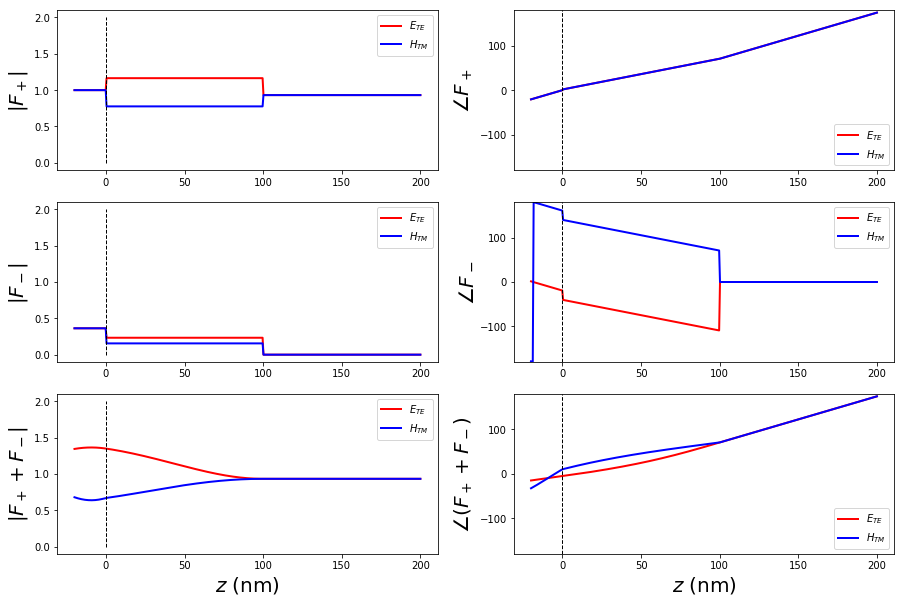

In [46]:
# incidence angle = 0
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=0)

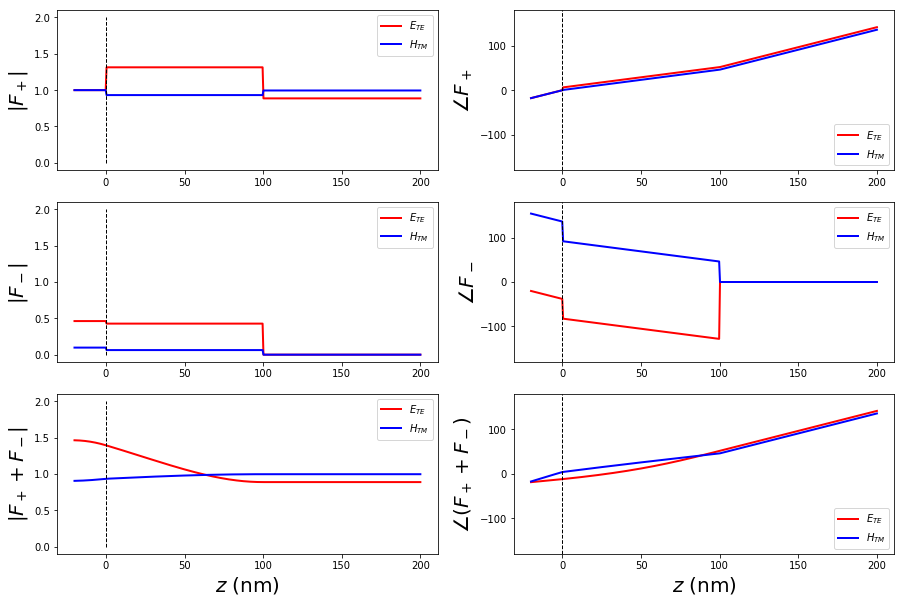

In [47]:
# incidence angle = 30
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=1)

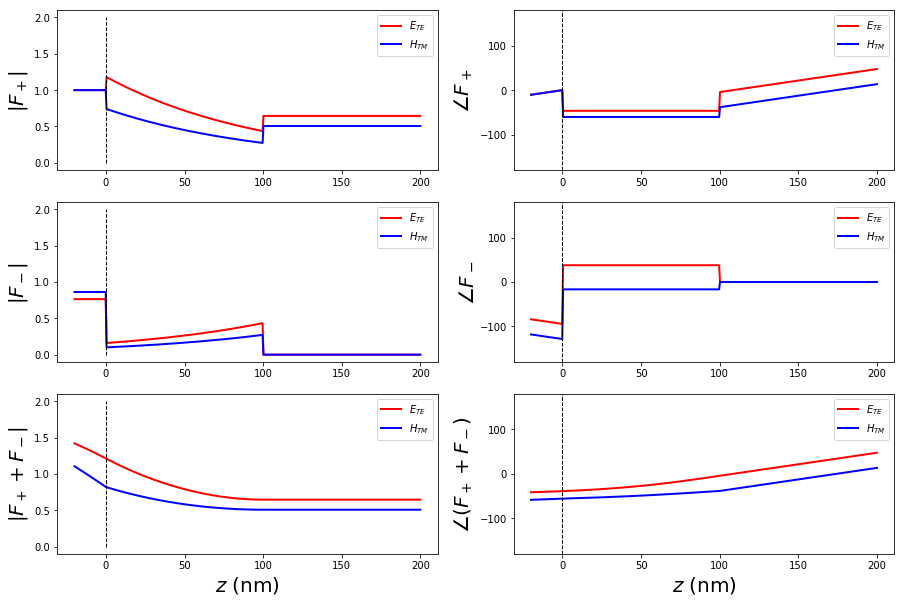

In [48]:
# incidence angle = 60
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=2)

Because the air become thicker, the +z evanescent wave would decay to a lower value compared to the thinner air thickness and hence the magnitude of the reflected -z evanescent wave would also become smaller compared to the previous structure. And it is obvious in the figure of reflection coefficient. When $\theta_i$ is large, the magnitude of the reflection coefficient is much closing 1.0, showing that the EM wave perform more like the totally internal reflection (TIR).

<img src="Lecture-8-Material/Fig-4.jpg" width= "400">
$$Fig. 4.$$

In [50]:
# constants
e0, mu0 = 1.0, 1.0
c = 1/np.sqrt(e0*mu0)

# input structure and parameters
n_array = np.array( [1.5, 1.0, 1.5], dtype = np.complex )
theta1 = np.linspace( 0, np.pi/2 , 100)
wavelength = 520
thickness_list = [0, 520, 0]

# input parameters process
ko = 2*np.pi/wavelength
w = c * ko

# from angle to wave number
k1 = n_array[0]*ko
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )

# calculation by transfer matrix
er_list = n_array**2
tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-185, 185)

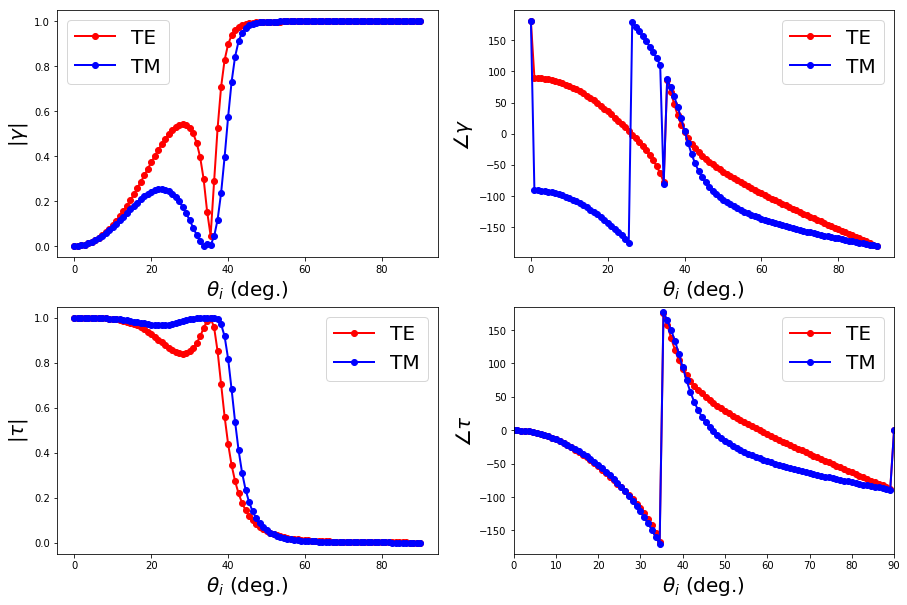

In [51]:
## plot data
fig, axes = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0,0].plot( theta1*180/np.pi, np.abs( r_s_E_TM ), 'ro-', linewidth=2.0)
axes[0,0].plot( theta1*180/np.pi, np.abs( r_p_H_TM ), 'bo-', linewidth=2.0)
axes[0,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,0].set_ylabel(r'$|\gamma|$', fontsize=20)
axes[0,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[0,1].plot( theta1*180/np.pi, np.angle( r_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[0,1].plot( theta1*180/np.pi, np.angle( r_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[0,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,1].set_ylabel(r'$\angle\gamma$', fontsize=20)
axes[0,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

axes[1,0].plot( theta1*180/np.pi, np.abs( tau_s_E_TM ), 'ro-', linewidth=2.0)
axes[1,0].plot( theta1*180/np.pi, np.abs( tau_p_H_TM ), 'bo-', linewidth=2.0)
axes[1,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,0].set_ylabel(r'$|\tau|$', fontsize=20)
axes[1,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[1,1].plot( theta1*180/np.pi, np.angle( tau_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[1,1].plot( theta1*180/np.pi, np.angle( tau_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[1,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,1].set_ylabel(r'$\angle\tau$', fontsize=20)
axes[1,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -185, 185)

Don't feel uncomfortable about a drop point in the phase of $\gamma$ for TM mode, because the magnitude is close to zero and then the phase would become meaningless.

In [52]:
Ts, Rs, As = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
Tp, Rp, Ap = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-10, 110)

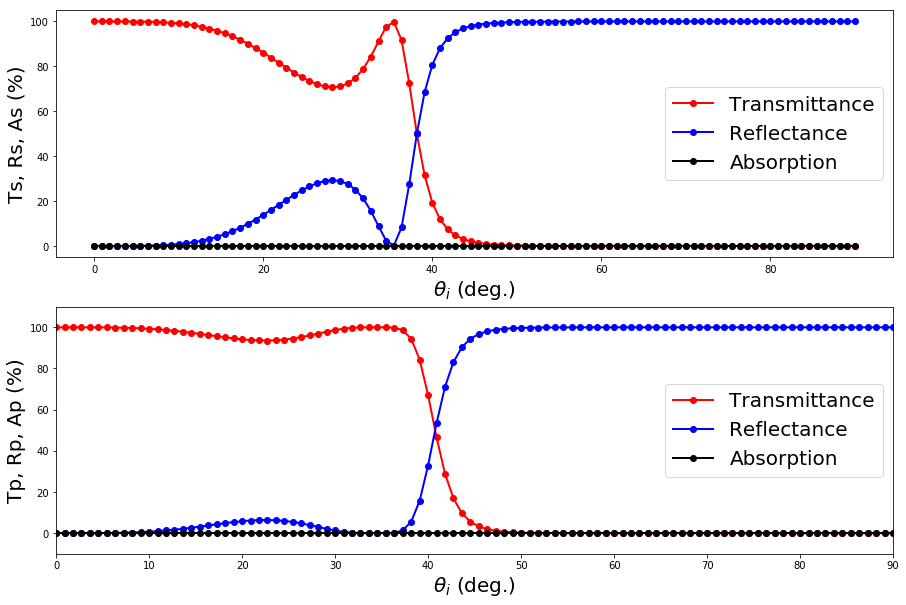

In [53]:
## plot data
fig, axes = plt.subplots(2,1)

axes[0].plot( theta1*180/np.pi, Ts * 100, 'ro-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, Rs * 100, 'bo-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, As * 100, 'ko-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'Ts, Rs, As (%)', fontsize=20)
axes[0].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

axes[1].plot( theta1*180/np.pi, Tp * 100, 'ro-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Rp * 100, 'bo-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Ap * 100, 'ko-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'Tp, Rp, Ap (%)', fontsize=20)
axes[1].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -10, 110)

In [57]:
theta1 = np.array( [0, 30, 60], dtype=np.float )/180*np.pi
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )
z_list = np.linspace(-20, 1000, 1000)
Ep_zlist, En_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TE', Fp = 1.0)
Hp_zlist, Hn_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TM', Fp = 1.0)

tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

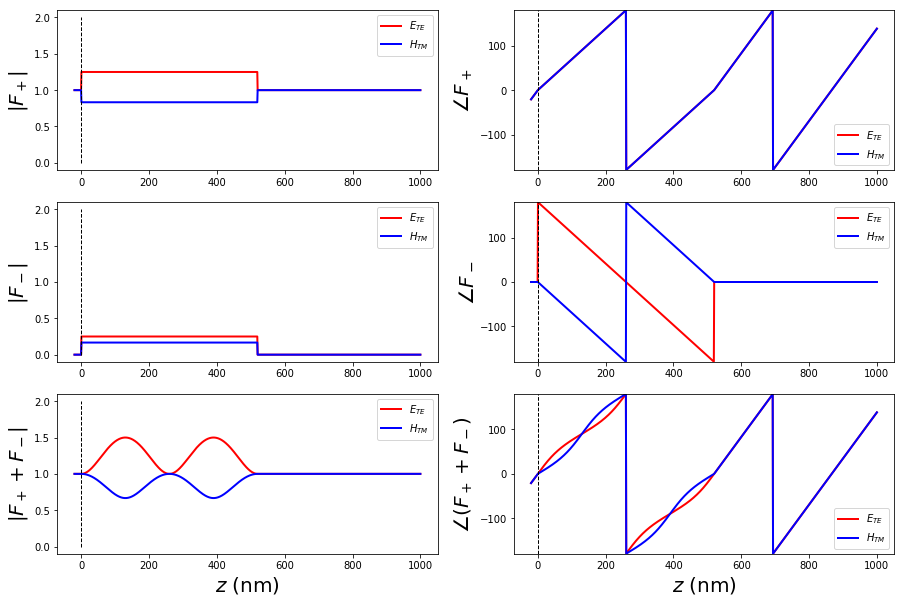

In [58]:
# incidence angle = 0
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=0)

Because the thickness of the air is much thicker than the previous case, then in the air, there would be two peaks. On the other hand, because the thickness of the air corresponds to a wavelength (520 nm = $\lambda$), then z=520 nm is the same as z=0 nm (the phase is similar).  It seems that the thickness of the air become zero and then the transmittance of the normal direction is 100%.

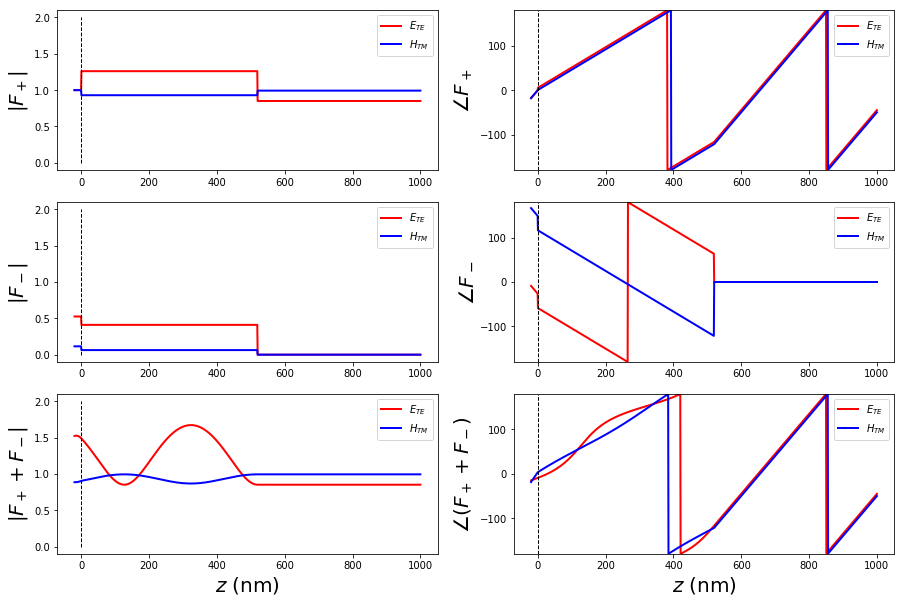

In [59]:
# incidence angle = 30
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=1)

However, different from the normal incidence, the thickness of the air would not equal to the wavelength along z direction (520 nm $\neq \lambda_z$) and hence, the transmittance is not equal to 100%. Besides, observing the total field of TE mode, the electric field is at peak value/node at $z=0$, showing that the magnitude of -z wave is high so the reflectane would achieve highest value as shown in RTA figure.

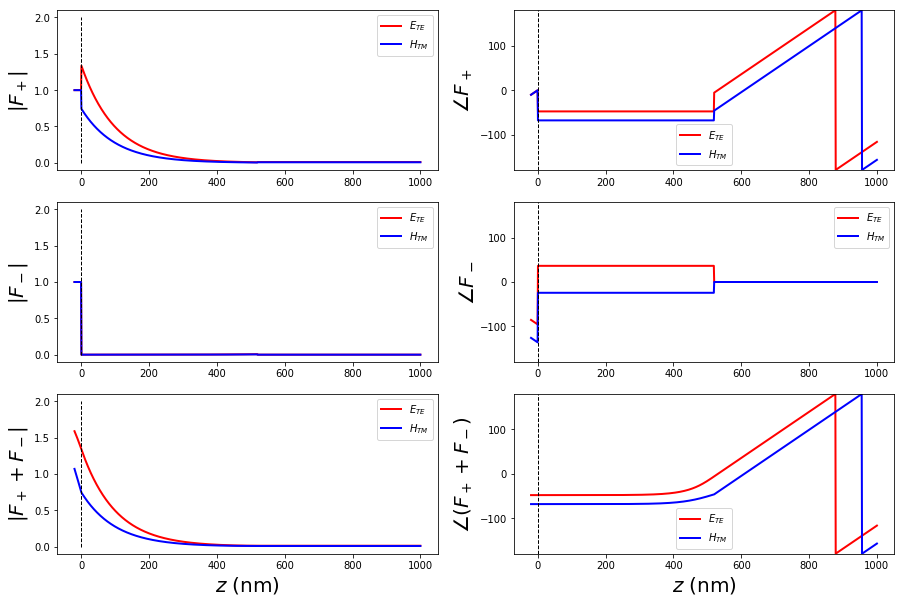

In [60]:
# incidence angle = 60
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=2)

As we said in the previous cases, when the thickness of the air becomes thicker and the +z evanescent wave would decrease to an extremely low value so the -z evanescent wave would also close to zero, indicating that the EM wave cannot percieved the interface between the second material and the third material. As a result, when $\theta_i$ is large, the EM wave would perform closer to a single interface of $n_1 = 1.5$ and $n_2 = 1.0$.

In conclusion, when the thickness of the middle material is thin, the wave would not perceive the middle because the wave can directly tunnel through the air even when the incident angle is larger than the critical angle, $\theta_c$, between the first material and the second material. As the thickness of the middle material increasing, when $\theta_i > \theta_c$, the +z evanescent field would decrease to a lower level. Hence, the field reach to the interface between the second material and the material also becomes lower and this interface cannot substantially influence the shape of the EM wave. However, it doesn't means that in this structure the third material would become meaningless for all the incident angle. When $\theta_i < \theta_c$, because the thickness of the middle layer is thick, the number of wave ($d_{air}/\lambda_z$) would change rapidly for differnt angle. 

<font size="4">$$n = d_{air}/\lambda_z - (1)$$</font>

As we learned in **Lecture 1**, $\lambda_z = \lambda/cos\theta$, then

<font size="4">$$n = \frac{d_{air}}{(\lambda/ cos\theta)} =  \frac{d_{air}\times cos\theta}{\lambda}- (2)$$</font>

Hence, the response of the different incident angle would also becomes different because of the interference caused by the first interface and the second interface.